# **Impact of CoVID-19 and nationwide lockdowns on the Entertainment Industry**

## **Objectives/ guidelines:**

*   Segregate all data region-wise
*   Determining the worst-hit countries and regions
*   Observing the spike in subscriptions to OTTs like **Netflix, Amazon Prime Video, Disney+ Hotstar**, etc.
*   Drawing insights into daily usage of devices connected to the Internet
*   Briefly comprehending the significance of television and social media as a source of entertainment
*   Accounting for the rise in online gaming and e-sports, and visualizing the impact on services like **Twitch**, **Steam** and **Discord**.
*   Consequently, understanding the increase in data usage.






## **Data Sources and Bibliography**

# **Part 1:**

### **Cleaning data and tracing the spread of CoVID-19 to determine the worst-hit countries**

After scraping websites on the Internet and reputed data warehouses, data in the form of **comma seperated values (CSV) files** have been obtained. 

This data needs to be cleaned and organised, so that powerful functions from **Python's pandas and sklearn libraries** can be used for fruitful data analysis.

Data from CSV files will be stored in pandas **DataFrames**; a relational data management structure that stores data in rows and columns for easy, linear access.

In [0]:
import pandas as pd

latitudes = pd.read_csv('latitudes.csv')
covid_data = pd.read_csv('covid_19_data.csv')

In [2]:
latitudes_countries = latitudes.iloc[:, :4]
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [3]:
covid_data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


### **Finding all countries listed in the Country/ Region column of CoVID Dataset:**

In [4]:
covid_data['Country/Region'].unique()   #Returns all unique labels contained in the column
covid_data['Country/Region'].nunique()   #Returns number of unique labels contained in the column

185

### **Similarly, finding all countries listed under the 'Country' column of the latitudes dataset**

In [5]:
latitudes_countries['country'].unique()
latitudes_countries['country'].nunique()

245

### **We Observe:**
- China is called "Mainland China" in the CoVID-19 Dataset
- The number of countries in the latitude dataset is more; the countries present in both datasets need to be replaced with their corresponding latitudes

Hence, we need to:
- Check for extra countries in either dataset
- Merge those countries with bigger countries manually (ex: if one dataset calls it US while the other calls it United States, both need to be merged into one label and so on)
- Discard redundant countries/ countries with zero cases

In [6]:
latitudes_countries['country'].unique()

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia',
       'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Cocos [Keeling] Islands', 'Congo [DRC]',
       'Central African Republic', 'Congo [Republic]', 'Switzerland',
       "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethi

In [7]:
covid_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea-Bissau',

In [0]:
#Define a function to seperate extra countries in both datasets
import numpy as np

def extra_countries(c1, c2):
  extra_countries = []
  for i in c1:
    flag = 0
    for j in c2:
      if (i == j):
        flag = 1
    if (flag == 0):
      extra_countries.append(i)
  
  return np.array(extra_countries)

In [9]:
#Finding countries that are in latitudes.csv but not in covid_19_data.csv

extra_countries(latitudes_countries['country'].unique(), covid_data['Country/Region'].unique())

array(['Anguilla', 'Netherlands Antilles', 'Antarctica', 'American Samoa',
       'Aruba', 'Bermuda', 'Bouvet Island', 'Cocos [Keeling] Islands',
       'Congo [DRC]', 'Congo [Republic]', "Côte d'Ivoire", 'Cook Islands',
       'Cape Verde', 'Christmas Island', 'Czech Republic',
       'Falkland Islands [Islas Malvinas]', 'Micronesia', 'Faroe Islands',
       'French Guiana', 'Guernsey', 'Gibraltar', 'Greenland',
       'Guadeloupe', 'South Georgia and the South Sandwich Islands',
       'Guam', 'Gaza Strip', 'Hong Kong',
       'Heard Island and McDonald Islands', 'Isle of Man',
       'British Indian Ocean Territory', 'Jersey', 'Kiribati', 'Comoros',
       'North Korea', 'South Korea', 'Cayman Islands', 'Lesotho',
       'Marshall Islands', 'Macedonia [FYROM]', 'Myanmar [Burma]',
       'Macau', 'Northern Mariana Islands', 'Martinique', 'Montserrat',
       'New Caledonia', 'Norfolk Island', 'Nauru', 'Niue',
       'French Polynesia', 'Saint Pierre and Miquelon',
       'Pitcairn Is

In [10]:
#Finding countries that are in covid_19_data.csv but not in latitudes.csv

extra_countries(covid_data['Country/Region'].unique(),latitudes_countries['country'].unique())

array(['Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Czechia', 'Diamond Princess', 'Eswatini',
       'Holy See', 'Korea, South', 'MS Zaandam', 'North Macedonia',
       'Sao Tome and Principe', 'South Sudan', 'Taiwan*', 'US',
       'West Bank and Gaza'], dtype='<U21')

### **Replace country names in CoVID-19 dataset with matching names from Latitudes dataset**

In [0]:
corrected_covid_data = covid_data.replace(['Burma','Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Czechia', 'Diamond Princess',
       'Korea, South', 'North Macedonia',
       'South Sudan', 'Taiwan*', 'US',
       'West Bank and Gaza'], ['Myanmar [Burma]', 'Congo [DRC]', 'Congo [DRC]', "Côte d'Ivoire", 'Czech Republic',
                               'Japan', 'South Korea',
                               'Macedonia [FYROM]', 'Sudan', 'Taiwan', 'United States', 'Gaza Strip'])
countries_to_drop = ['Holy See','Eswatini', 'Cabo Verde','MS Zaandam',
                     'Sao Tome and Principe']

In [12]:
corrected_covid_data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [13]:
# Finding countries in corrected_covid_data but not in latitudes

extras = extra_countries(corrected_covid_data['Country/Region'].unique(), latitudes_countries['country'].unique())
print(extras)

['Cabo Verde' 'Eswatini' 'Holy See' 'MS Zaandam' 'Sao Tome and Principe']


In [0]:
# Removing the countries whose latitude data is unavailable

for i in extras:
  corrected_covid_data = corrected_covid_data[corrected_covid_data['Country/Region'] != i]

### **Enter code to replace the Country/ Region column with the latitude and longitude columns**

Also, drop unnecessary columns

In [15]:
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
req_lat_long = latitudes_countries.loc[:,['country','latitude', 'longitude']]
req_lat_long = req_lat_long.set_index('country')

In [0]:
latitude_cols = []
longitude_cols = []

for i in corrected_covid_data['Country/Region']:
  latitude = req_lat_long.loc[i, 'latitude']
  longitude = req_lat_long.loc[i, 'longitude']
  latitude_cols.append(latitude)
  longitude_cols.append(longitude)

latitude_cols = np.array(latitude_cols)
longitude_cols = np.array(longitude_cols)

In [0]:
corrected_covid_data['Latitude'] = latitude_cols
corrected_covid_data['Longitude'] = longitude_cols

In [19]:
corrected_covid_data = corrected_covid_data.drop(['Lat','Long'], axis = 1)
corrected_covid_data.head()       #Obtained latitude and longitude for all countries within the dataframe

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Latitude,Longitude
0,2020-01-22,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
1,2020-01-23,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
2,2020-01-24,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
3,2020-01-25,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
4,2020-01-26,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953


In [20]:
corrected_covid_data = corrected_covid_data.drop(['Province/State'], axis = 1)
corrected_covid_data.head()

,Date,Country/Region,Confirmed,Recovered,Deaths,Latitude,Longitude
0,2020-01-22,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
1,2020-01-23,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
2,2020-01-24,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
3,2020-01-25,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
4,2020-01-26,Afghanistan,0.0,0.0,0.0,33.93911,67.709953


In [0]:
#Obtain a list of all affected countries
def most_affected(X):
  country_cases = {}
  countries = X.index.unique()
  for i in countries:
    cases =  np.sum(X.loc[[i],['Confirmed']])
    country_cases[i] = cases

  country_cases_df = pd.DataFrame(country_cases)
  country_cases_df = country_cases_df.transpose()
  affected_countries = []
  for i in range(8):
    country = country_cases_df[['Confirmed']].idxmax()['Confirmed']
    affected_countries.append(country)
    country_cases_df = country_cases_df.drop([country], axis = 0)

  return affected_countries

In [0]:
corrected_covid_data['Date'] =  pd.to_datetime(corrected_covid_data['Date'],
                              format='%Y-%m-%d')

In [23]:
temperature = pd.read_csv('temperature_dataframe.csv')
temperature.head()

,Unnamed: 0,id,province,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,Kabul,65.0,8.7,-1.0,8.0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,Kabul,59.0,8.7,-3.0,8.0
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,Kabul,71.0,7.1,0.0,7.0
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,Kabul,79.0,8.7,0.0,7.0
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,Kabul,64.0,8.7,-1.0,8.0


In [0]:
humidity = (temperature['humidity'].groupby(temperature['country']))
temp = temperature['tempC'].groupby(temperature['country'])

In [0]:
temp_corrected_data = temperature.replace(['Barbuda', 'Aruba', "Cote d'Ivoire", 'French Guiana',
       'Greenland', 'Guadeloupe', 'Korea',
       'Macedonia', 'Congo', 'USA', 'UAE', 'UK'], ['Antigua and Barbuda', 'Netherlands', "Côte d'Ivoire", 'France',
                                        'Denmark', 'France', 'South Korea', 'North Macedonia', 'Congo (Kinshasa)', 'United States',
                                        'United Arab Emirates', 'United Kingdom'])
countries_to_drop = ['Eswatini', 'Guam', 'Guernsey', 'Jersey', 'Martinique', 'Mayotte', 'Puerto Rico', 'Reunion']

In [0]:
#import statistics
avg_stuff = pd.DataFrame()
avg_stuff['Avg_temp'] = (temp_corrected_data['tempC'].groupby(temp_corrected_data['country'])).mean()
avg_stuff['Avg_humidity'] = (temp_corrected_data['humidity'].groupby(temp_corrected_data['country'])).mean()

In [0]:
temp = []
humidity = []

for i in corrected_covid_data['Country/Region']:
  try:
    temperature = avg_stuff.loc[i, 'Avg_temp']
    humid = avg_stuff.loc[i, 'Avg_humidity']
    temp.append(temperature)
    humidity.append(humid)
  except KeyError:
    temp.append(None)
    humidity.append(None)
temp = np.array(temp)
humidity = np.array(humidity)

In [0]:
corrected_covid_data['Average Temperature'] = temp
corrected_covid_data['Average Humidity'] = humidity

In [29]:
corrected_covid_data

,Date,Country/Region,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
0,2020-01-22,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
1,2020-01-23,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
2,2020-01-24,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
3,2020-01-25,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
4,2020-01-26,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
...,...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,23.0,1.0,3.0,-19.015438,29.154857,None,None
23756,2020-04-17,Zimbabwe,24.0,2.0,3.0,-19.015438,29.154857,None,None
23757,2020-04-18,Zimbabwe,25.0,2.0,3.0,-19.015438,29.154857,None,None
23758,2020-04-19,Zimbabwe,25.0,2.0,3.0,-19.015438,29.154857,None,None


In [30]:
corrected_covid_data.set_index(['Country/Region'])

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-23,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-24,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-25,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-26,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
...,...,...,...,...,...,...,...,...
Zimbabwe,2020-04-16,23.0,1.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-17,24.0,2.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-18,25.0,2.0,3.0,-19.015438,29.154857,None,None


In [0]:
corrected_covid_data.reset_index(drop = True, inplace = True)

In [0]:
corrected_covid_data.set_index('Country/Region', inplace = True)

In [0]:
df_most_affected = corrected_covid_data
affected = most_affected(df_most_affected)

In [34]:
# Print the 8 most affected countries

print(affected)

['United States', 'China', 'Italy', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom']


**Plot for Cases/day vs Dates**

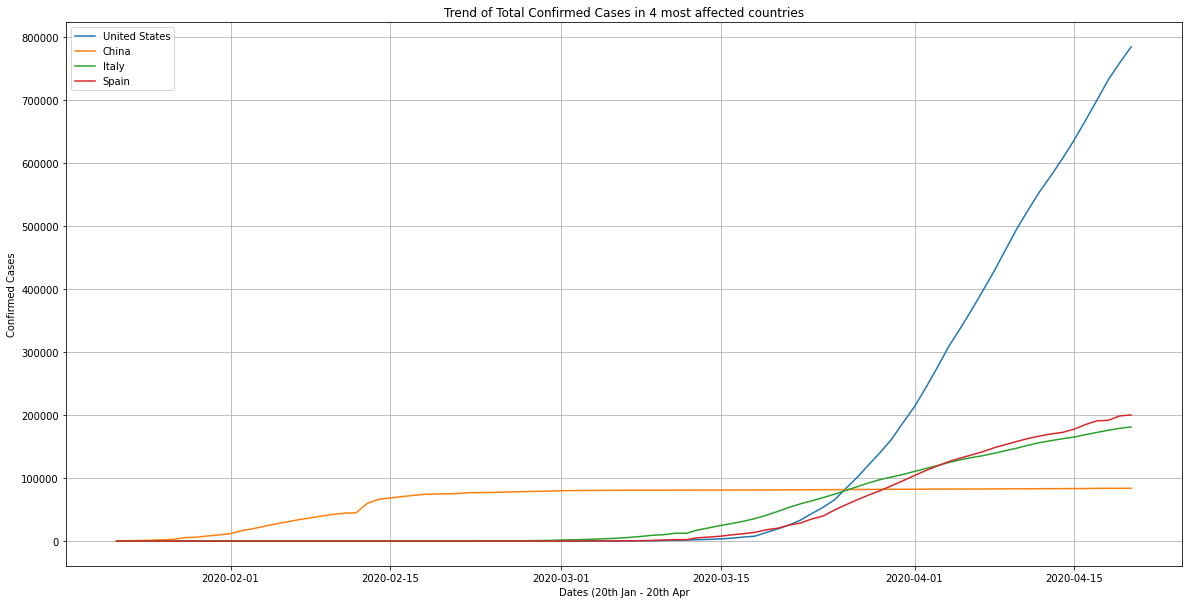

In [35]:
# Cases vs dates
import matplotlib.pyplot as plt
%matplotlib inline

cases_day = df_most_affected
plt.figure(figsize = [20,10])
for i in range(4):
  j = df_most_affected.loc[affected[i], ['Confirmed','Date']]
  j.reset_index(drop = True, inplace = True)
  j = j.groupby(["Date"]).sum()
  plt.plot(j.index, j['Confirmed'], label = str(affected[i]))

plt.xlabel('Dates (20th Jan - 20th Apr')
plt.ylabel('Confirmed Cases')
plt.title('Trend of Total Confirmed Cases in 4 most affected countries')
plt.legend()
plt.grid()

In [0]:
def cases_per_day(X):
  cases_day = []
  cases = 0
  for i in range(len(X.index) - 1):
    cases = X.iloc[(i + 1), 0] - X.iloc[i, 0]
    cases_day.append(cases)
  cases = X.iloc[(len(X.index) - 1), 0] - X.iloc[(len(X.index) - 2), 0]
  cases_day.append(cases)
  
  X['Cases per Day'] = np.array(cases_day)

  return X

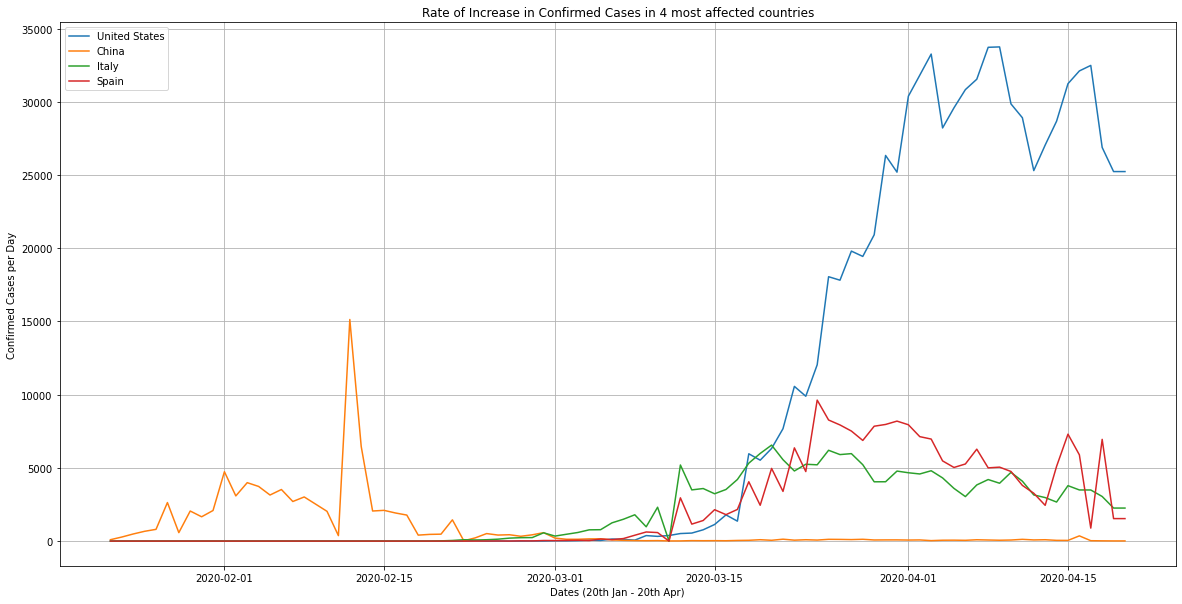

In [37]:
# Cases per Day vs Dates

%matplotlib inline
plt.figure(figsize = [20, 10])

for i in range(4):
  j = df_most_affected.loc[affected[i], ['Confirmed','Date']]
  j.reset_index(drop = True, inplace = True)
  j = j.groupby(["Date"]).sum()
  j = cases_per_day(j)
  plt.plot(j.index, j['Cases per Day'], label = affected[i])

plt.xlabel('Dates (20th Jan - 20th Apr)')
plt.ylabel('Confirmed Cases per Day')
plt.title('Rate of Increase in Confirmed Cases in 4 most affected countries')
plt.legend()
plt.grid()

## **Part 1 Inference:**

* **United States of America (USA), Italy, Spain** and **China** are among the worst hit countries in the pandemic.
* China has managed to **flatten the curve** and prevent additional rise in the number of cases by the beginning of **March 2020**.
* United States of America has the highest rate of increase in the number of cases. Italy and Spain have managed to curb the spread of the virus and are witnessing a decrease in the rate of new cases.

# **Part 2:** 
**Analysing the pivoting table of the entertainment industry**

In [38]:
# General device usage (device_usage_increase)
import seaborn as sns

device_usage = pd.read_excel('device_usage_increase.xlsx', sheet_name='Data')
device_usage

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Device,Gen Z,Millennials,Gen X,Baby Boomers
0,Smartphone/mobile phone,82,72,66,43
1,Laptop,56,42,33,27
2,PC/desktop,34,31,31,35
3,Smart TV/media streaming service,29,32,30,23
4,Tablet,22,27,16,16
5,Games console,16,18,9,1
6,Smart speaker,11,12,6,3
7,Smartwatch,9,7,4,1
8,Other,2,1,1,2
9,None of these,1,7,11,20


In [0]:
device_usage.reset_index()
device_usage.set_index('Device', inplace=True)

In [40]:
device_usage

,Gen Z,Millennials,Gen X,Baby Boomers
Device,,,,
Smartphone/mobile phone,82,72,66,43
Laptop,56,42,33,27
PC/desktop,34,31,31,35
Smart TV/media streaming service,29,32,30,23
Tablet,22,27,16,16
Games console,16,18,9,1
Smart speaker,11,12,6,3
Smartwatch,9,7,4,1
Other,2,1,1,2


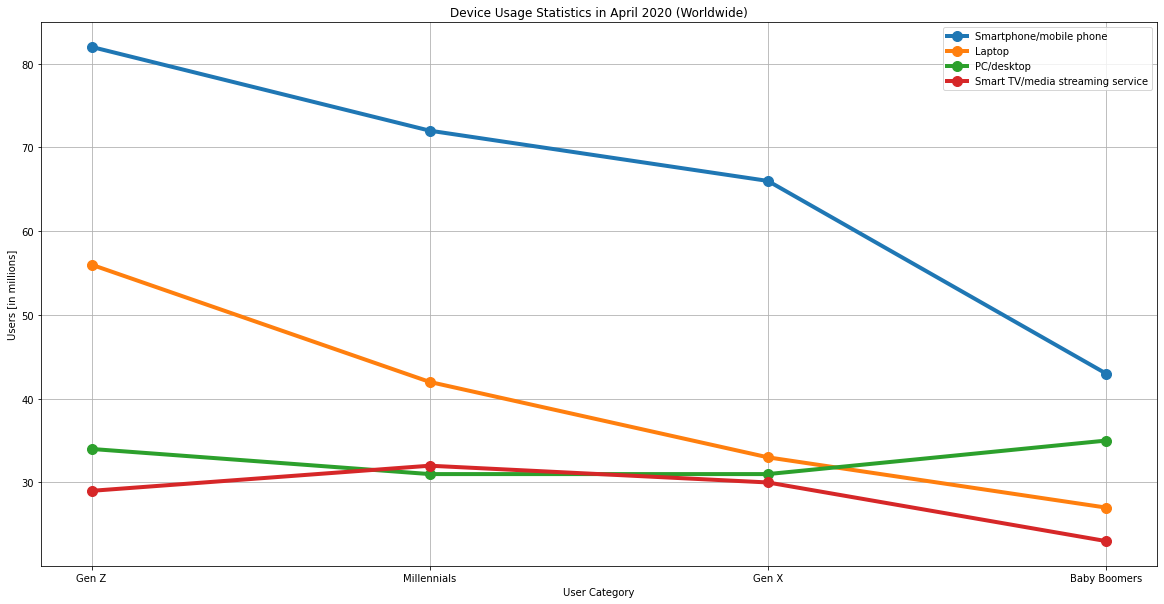

In [48]:
plt.figure(figsize=[20,10])
for i in device_usage.index[:4]:
  plt.plot(device_usage.columns, device_usage.loc[i, :], label = i, linewidth = 4, marker = 'o', markersize = 10)
plt.title('Device Usage Statistics in April 2020 (Worldwide)')
plt.ylabel('Users [in millions]')
plt.xlabel('User Category')
plt.legend()
plt.grid()

Text(0, 0.5, 'Number of devices used [in millions]')

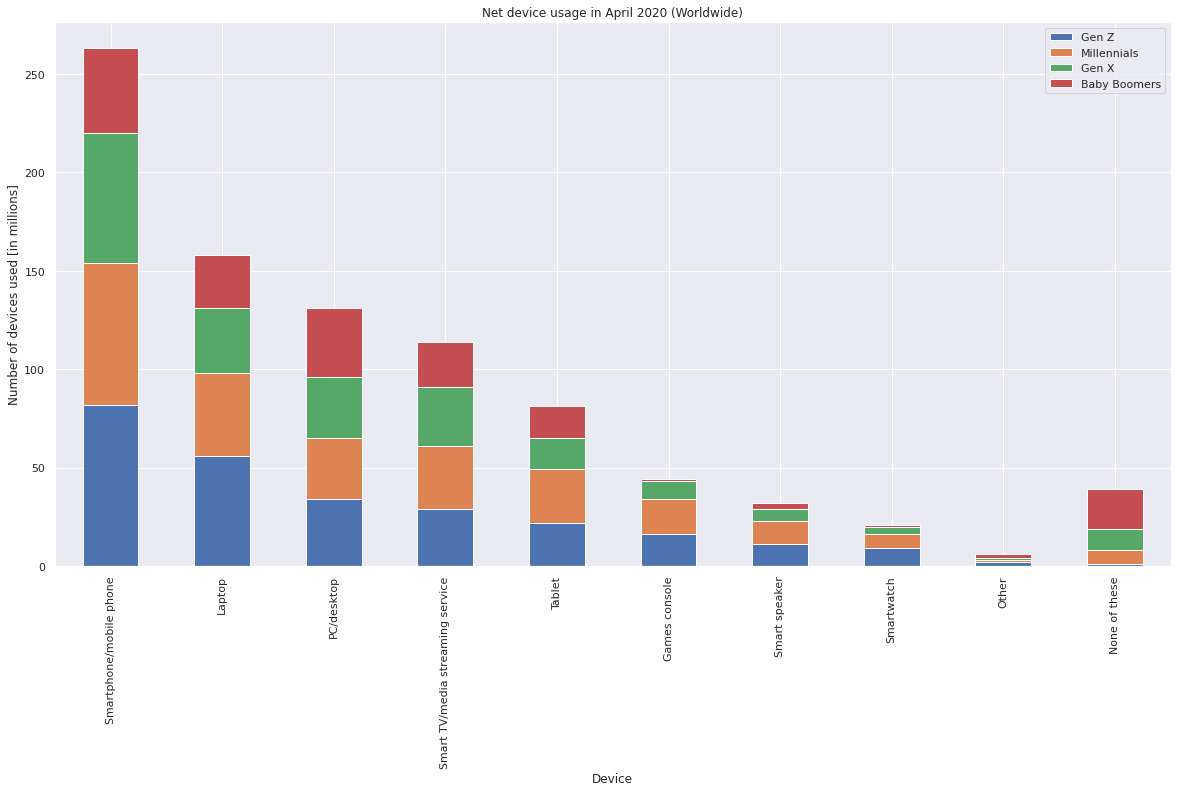

In [55]:
# Net device usage per category

sns.set()
device_usage.plot(kind = 'bar', stacked = True, figsize = [20,10])

plt.title('Net device usage in April 2020 (Worldwide)')
plt.ylabel('Number of devices used [in millions]')

In [56]:
# Device usage per country (device_usage_per_country)

dev_usage_country = pd.read_excel('device_usage_per_country.xlsx')
dev_usage_country

,Device,Italy,Spain,France,Germany,China,United States,United Kingdom,Singapore,Australia,Brazil,Japan,Philippines,South Africa
0,Smartphone/mobile phone,72,64,41,33,86,40,38,64,38,77,47,86,72
1,Laptop,47,47,37,29,45,37,31,41,32,37,12,51,51
2,PC/desktop,26,28,30,23,35,23,16,21,23,37,46,35,32
3,Smart TV/media streaming service,29,35,13,18,32,29,22,18,18,44,11,37,30
4,Tablet,22,23,11,12,27,20,17,18,16,11,15,16,18
5,Games console,14,12,15,10,14,13,14,8,10,18,16,9,13
6,Smart speaker,5,4,3,4,13,8,7,3,5,3,4,6,6
7,None of these,2,2,21,34,1,22,26,11,26,5,16,1,7
8,Smartwatch,4,4,1,3,8,4,3,7,4,4,4,4,5


In [57]:
dev_usage_country.reset_index()
dev_usage_country.set_index('Device', inplace = True)
dev_usage_country

,Italy,Spain,France,Germany,China,United States,United Kingdom,Singapore,Australia,Brazil,Japan,Philippines,South Africa
Device,,,,,,,,,,,,,
Smartphone/mobile phone,72,64,41,33,86,40,38,64,38,77,47,86,72
Laptop,47,47,37,29,45,37,31,41,32,37,12,51,51
PC/desktop,26,28,30,23,35,23,16,21,23,37,46,35,32
Smart TV/media streaming service,29,35,13,18,32,29,22,18,18,44,11,37,30
Tablet,22,23,11,12,27,20,17,18,16,11,15,16,18
Games console,14,12,15,10,14,13,14,8,10,18,16,9,13
Smart speaker,5,4,3,4,13,8,7,3,5,3,4,6,6
None of these,2,2,21,34,1,22,26,11,26,5,16,1,7
Smartwatch,4,4,1,3,8,4,3,7,4,4,4,4,5


In [0]:
# In-home media consumption (in-home_media_consumption)

In [0]:
# OTT (all OTT files)

In [0]:
# netflix_q1_regionwise

In [0]:
# disney+_increase

In [0]:
# social_network

In [0]:
# csgo_increase, cod_warzone